# $$Análisis\:en\:Frecuencia\:de\:Señales$$ #

![Image](Imagenes/inicio.PNG)

Trabajaremos las aproximaciones de las transformadas usando **DFT**

## $1-Real\:Y\:Complejo\:DFT$ ## 

La transformada, toma números reales y dá 2 conjuntos de puntos en el dominio de la frecuencia.
* 1--> representa coeficientes del coseno (parte real).
* 2--> representa coeficientes del seno (parte imaginaria).  
Además DFT compleja representa frecuencias **positiva y negativa.**

### $1.1-Real\:DFT$ ###

forma N puntos de la onda en el dominio del tiempo (discretizando) y agrupando en N/2+1 para los coeficientes del coseno y seno respectivamente.  
$$x_{re}[k]=\frac{2}{N}\sum_{n=0}^{N-1}x[n]\cos(\frac{2\pi kn}{N})$$
$$x_{im}[k]=-\frac{2}{N}\sum_{n=0}^{N-1}x[n]\sin(\frac{2\pi kn}{N})$$

**Nota:** en el domonio del tiempo **n va de 0-->N**  
en el dominio de la frecuencia **k va de 0-->N/2.**  
$$x[n]=\sum_{n=0}^{N/2}x_{re}[K]\cos(\frac{2\pi kn}{N})-x_{im}[K]\sin(\frac{2\pi kn}{N})$$

![Image](Imagenes/real-DFT.PNG)

### $1.2-Complejo\:DFT$ ###  
toma N puntos para los valores complejos de la onda (discretizando) y produciendo arreglos en el dominio de frecuencia con longitud N.  
$$X[K]=\frac{1}{N}\sum_{n=0}^{N-1}x[n]e^{-j2\pi kn/N}$$  
* X[0]=el valor DC.
* los primeros N/2 son frecuencias positivos.
* los primeros N/2-1 son frecuencias negativas.

la reconstrucción de la señal x[n] de muestras en el dominio de frecuencias.  
$$x[n]=\sum_{k=0}^{N-1}X[K]e^{j2\pi kn/N}$$ 

![Image](Imagenes/complejo-DFT.PNG)

La interpretación en la salida:  
![Image](Imagenes/salida.PNG)

## $2-FFT$ ##  
Es un algoritmo publicado en 1965 por J.W.Cololey and J.W.Tuckey para ser eficiente el cálculo de **DFT**.  
Esto reduce significativamente el tiempo de cálculo. Permite calcular más rapido los coeficientes de **DFT**.

![Image](Imagenes/calculo-DFT.PNG)

lo que vemos es un calculo tradicional en DFT, pero si aplicamos el algoritmo notamos seria algo así:
![Image](Imagenes/FFT.PNG)

**NOTA:**  
* se recomienda que N sea multiplo de 2.
* para saber la cantidad de muestras tomadas.  
$$muestras=(t_f)(f_s)$$
$t_f=tiempo\:de\:duración\:de\:la\:señal$

para saber el espaciado o resolución de la frecuencia (es importante tener este parámetro para definer el eje de frecuencias), se calcula:
$$\vartriangle f=\frac{f_s}{N}$$
![Image](Imagenes/salida.PNG)

## $2.1-FFTSHIFT$ ###
Se encarga de intercambiar el rango de frecuencias desde **N/2 a N-1** al lado izquiero y **0 a N/2-1** al lado derecho.
![Image](Imagenes/FFTSHIFT.PNG)

sin embargo, según a la cantidad de puntos:
* si N es par:
$$f=\vartriangle{f}x\:i=\frac{f_s}{N}x\:i,\:donde\:i=[-\frac{N}{2},...,-1,0,1,...,\frac{N}{2}-1]$$
* si N es impar:
$$f=\vartriangle{f}x\:i=\frac{f_s}{N}x\:i,\:donde\:i=[-\frac{N+1}{2},...,-1,0,1,...,\frac{N+1}{2}-1]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, fftfreq
from IPython.display import Image

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


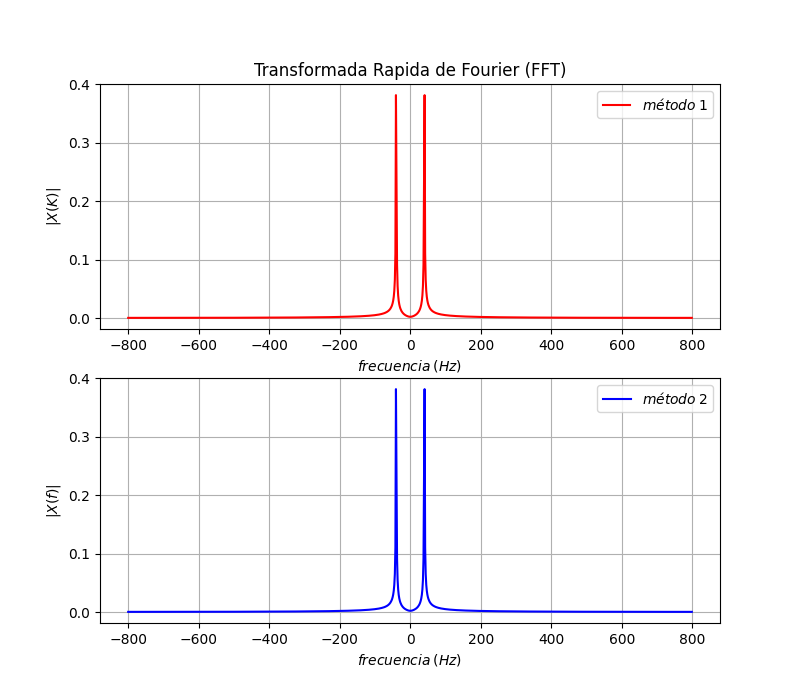

In [3]:
fc=40 #Frecuencia de la portadora
fs=40*fc #frecuencia de muestreo
tf=2 #tiempo de visualización 
tiempo=np.arange(0,tf,1/fs)
señal=np.cos(2*np.pi*fc*tiempo) #señal de entrada

N=2**10 #Número de puntos
df=fs/N #resolución de frecuencia
frec_1=np.arange(-N/2,N/2)*df #eje de frecuencias (método 1)
frec_2=fftfreq(N,1/fs) #me va a definir el eje de frecuencias (método 2).
frec_2=fftshift(frec_2)

fourier=fft(señal,N)*(1/N)
fourier=fftshift(fourier)

plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.title("Transformada Rapida de Fourier (FFT)")
plt.plot(frec_1, abs(fourier), color='r', label=f'$método\:1$') # usando delta(f)
plt.xlabel("$frecuencia\:(Hz)$")
plt.ylabel("$|X(K)|$")
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(frec_2, abs(fourier), color='b', label=f'$método\:2$') # usado f=delta(f)*i, i=intervalo de cantidad de puntos
plt.xlabel("$frecuencia\:(Hz)$")
plt.ylabel("$|X(f)|$")
plt.legend()
plt.grid()
plt.show()

![Image](https://slideplayer.es/slide/3572142/12/images/30/Transformada+y+Espectros+de+Fourier.jpg)

<IPython.core.display.Javascript object>


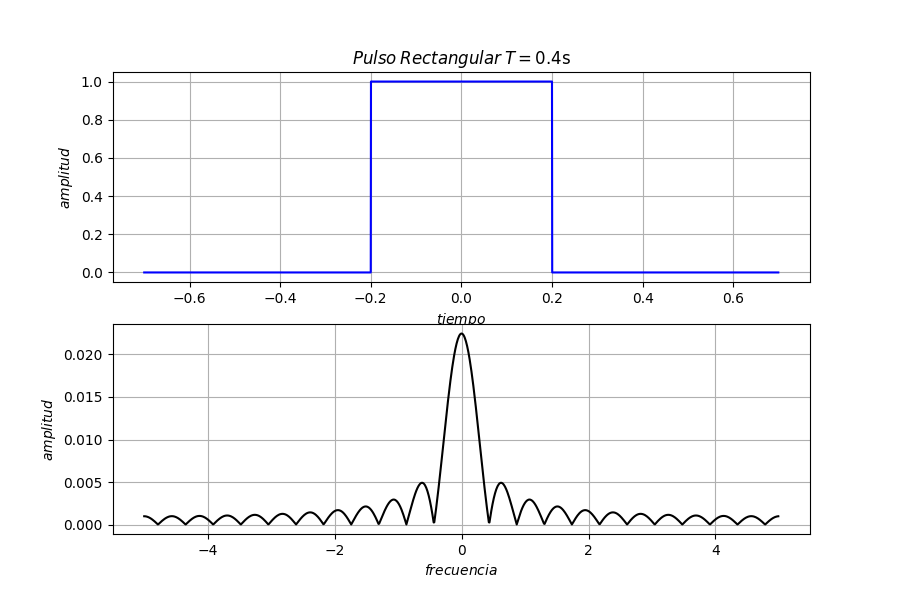

In [4]:
def rectangular(x):
    y=(x>-0.5)*(x<0.5)*1+0.5*(x==0.5)+0.5*(x==-0.5)
    return y

fs=10 #Frecuencia de muestreo para transformada de fourier
Fs=2000 #frecuencia de muestreo para la señal en el tiempo
T=0.4 #Ancho del pulso en seg
tiempo=np.arange(-0.7,0.7,1/Fs) #el eje de tiempo

señal=rectangular(tiempo/T)

N=2**10 #Número de puntos
df=fs/N #resolución de freecuencia
#frec_1=np.arange(-N/2,N/2)*df #eje de frecuencias (método 1)
frec_2=fftfreq(N, d=1/fs) #me va a definir el eje de frecuencias (método 2).
frec_2=fftshift(frec_2)

fourier=fft(señal,N)*(1/N)
fourier=fftshift(fourier)

plt.figure(figsize=(9,6))
plt.subplot(2,1,1)
plt.title(f'$Pulso\:Rectangular\:T=${T}s')
plt.plot(tiempo, señal, color='b')
plt.xlabel("$tiempo$")
plt.ylabel("$amplitud$")
plt.grid()

plt.subplot(2,1,2)
plt.plot(frec_2, abs(fourier), color='black', label='Trans.Fourier')
plt.xlabel("$frecuencia$")
plt.ylabel("$amplitud$")
plt.grid()
plt.show()

**NOTA:** la frecuencia de muestreo debe ser para cada señal que se representa en su dominio respectivamente.
* La frecuencia de muestreo y la cantidad de puntos afectan en la salida, se debe ajustar a realizar una cantidad de puntos lo suficientemente aceptable para visualizar en la gráfica. Lo que se busca es que la frecuencia sea lo más cercano posible (menor).
* fs viene hacer los extremos del eje de la frecuencia.

### $$Vamos\:a\:comprobar\:la\:teoría\:con\:el\:algoritmo\:computacional$$ ###


$$f(t)=te^{-t}$$
$$F(f)=\frac{1}{(1+i\omega)^2}$$

<IPython.core.display.Javascript object>


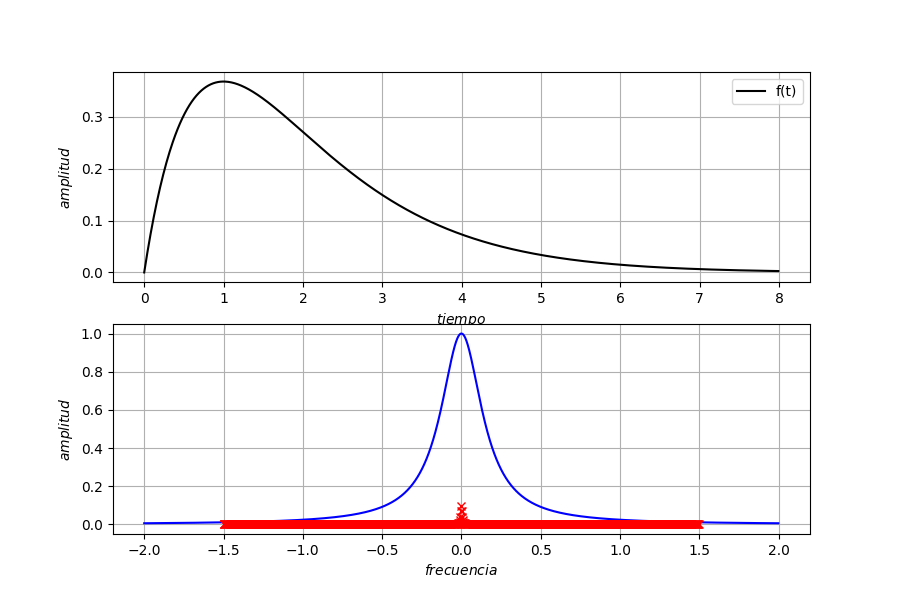

In [6]:
fs=3 #frecuencia de muestreo de la transformada de fourier
Fs=100 #frecuencia de muestreo de la señal en el dominio del tiempo
N=2**10 #cantidad de puntos
df=fs/N #resolución de la frecuencia
tiempo=np.arange(0,8,1/Fs)
funcion=tiempo*np.exp(-tiempo) #funcion en el dominio del tiempo
plt.figure(figsize=(9,6))
plt.subplot(2,1,1)
plt.plot(tiempo, funcion, color='black', label='f(t)')
plt.xlabel('$tiempo$')
plt.ylabel('$amplitud$')
plt.grid()
plt.legend()

#transformada rapida de fourier
salida=fft(funcion,N)*(1/N)
salida=fftshift(salida)
eje_fre=np.arange(-N/2,N/2)*df

frec_1=np.arange(-2,2,0.002)
T_orig=1/(1+2*np.pi*frec_1*1j)**2

plt.subplot(2,1,2)
plt.plot(frec_1,abs(T_orig), 'b')
plt.plot(eje_fre,abs(salida), 'rx')
plt.xlabel('$frecuencia$')
plt.ylabel('$amplitud$')
plt.grid()
plt.show()